# Classify the Size_Categorie using SVM

# Attributes:

month month of the year: 'jan' to 'dec'

day :: day of the week: 'mon' to 'sun'

FFMC ::FFMC index from the FWI system: 18.7 to 96.20

DMC :: DMC index from the FWI system: 1.1 to 291.3

DC ::DC index from the FWI system: 7.9 to 860.6

ISI ::ISI index from the FWI system: 0.0 to 56.10

temp:: temperature in Celsius degrees: 2.2 to 33.30

RH ::relative humidity in %: 15.0 to 100

wind ::wind speed in km/h: 0.40 to 9.40

rain ::outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie the burned area of the forest ( Small , Large)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding data
data = pd.read_csv('D:/ExcelR/Assignment/Support Vector Machines/forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
# dropping encoded columns
raw_data = data[['month', 'day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category' ]]
raw_data.head() 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [4]:
print(data.shape)
print(raw_data.shape)

(517, 31)
(517, 12)


Descriptive Statistics

In [5]:
raw_data.isna().sum().sum()

0

In [6]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [8]:
#Numeric_variables

numeric_features = [feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'] 



In [9]:
#categorical_variables

categorical_features = [feature for feature in raw_data.columns if raw_data[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['month', 'day', 'size_category']


In [10]:
#Corrrelation

raw_data.corr()['area'].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

Visualisation

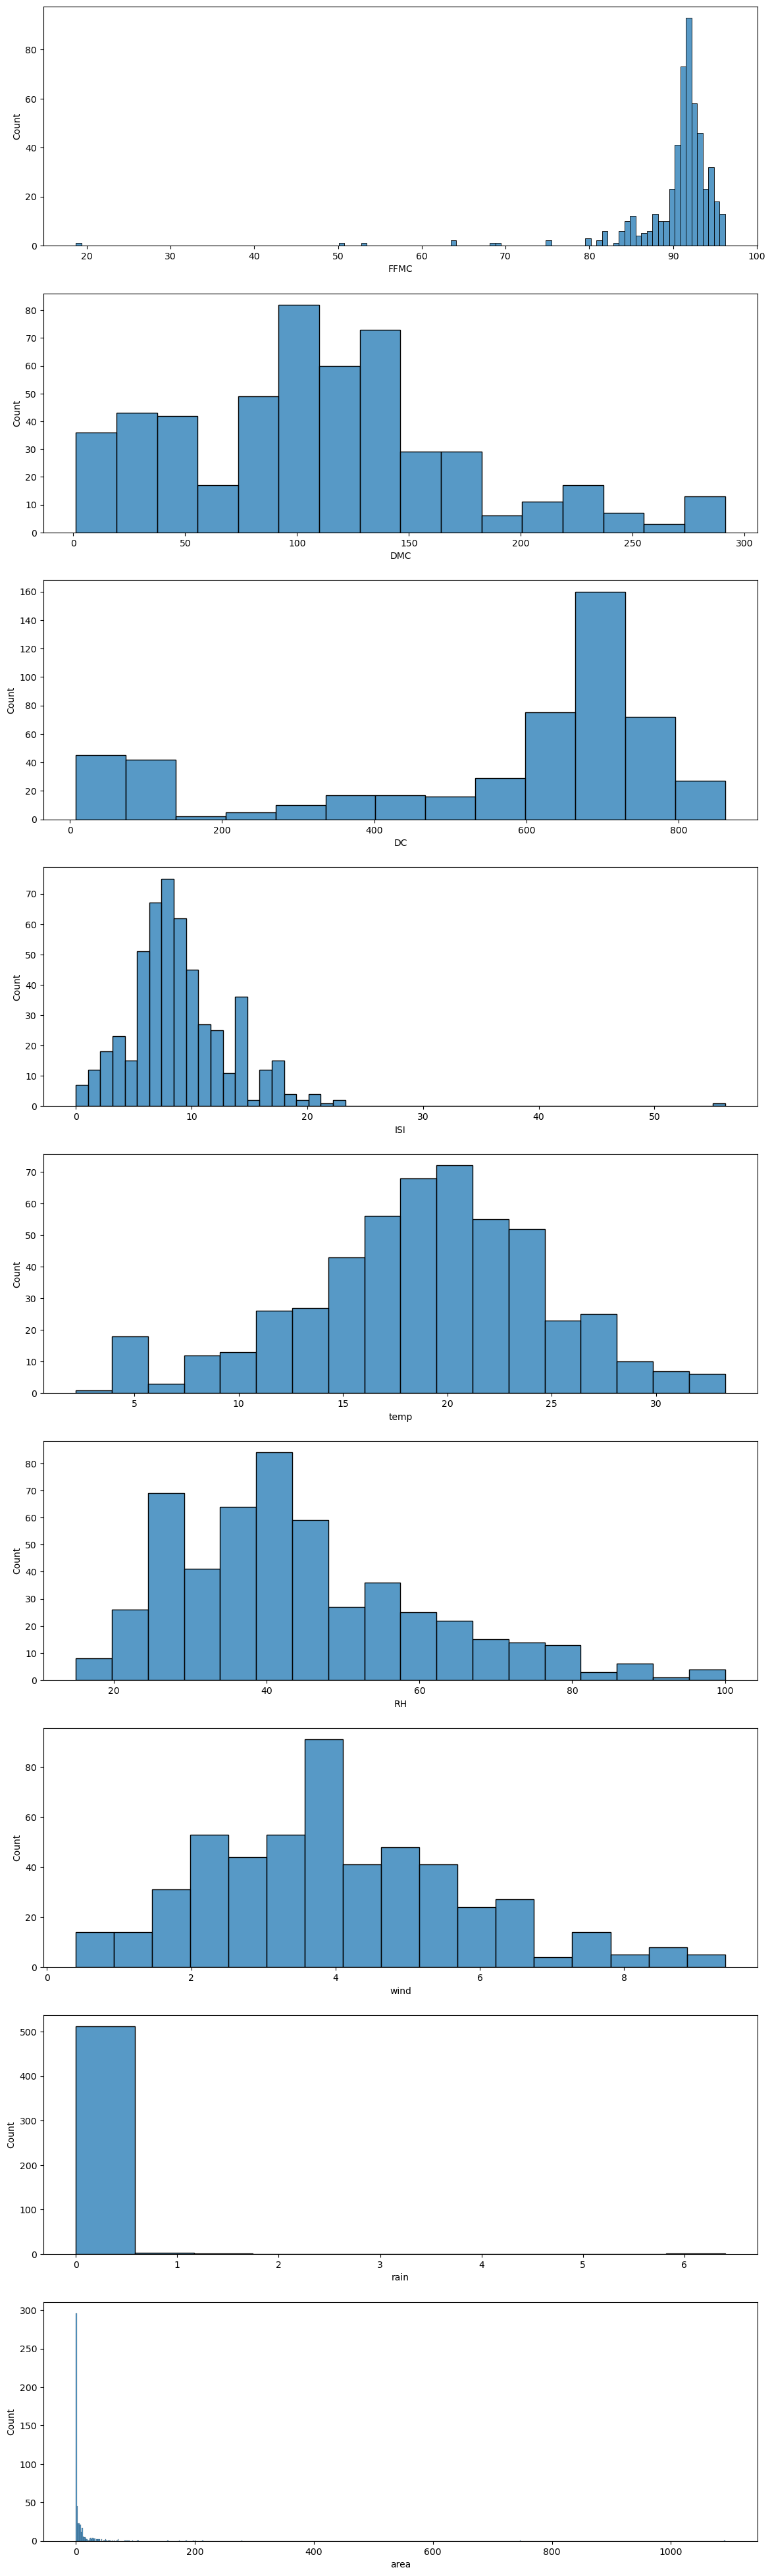

In [11]:
# for numerical_features -- histogram
fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range (0, len(numeric_features)):
    sns.histplot(data[numeric_features[i]],ax=axes[i])

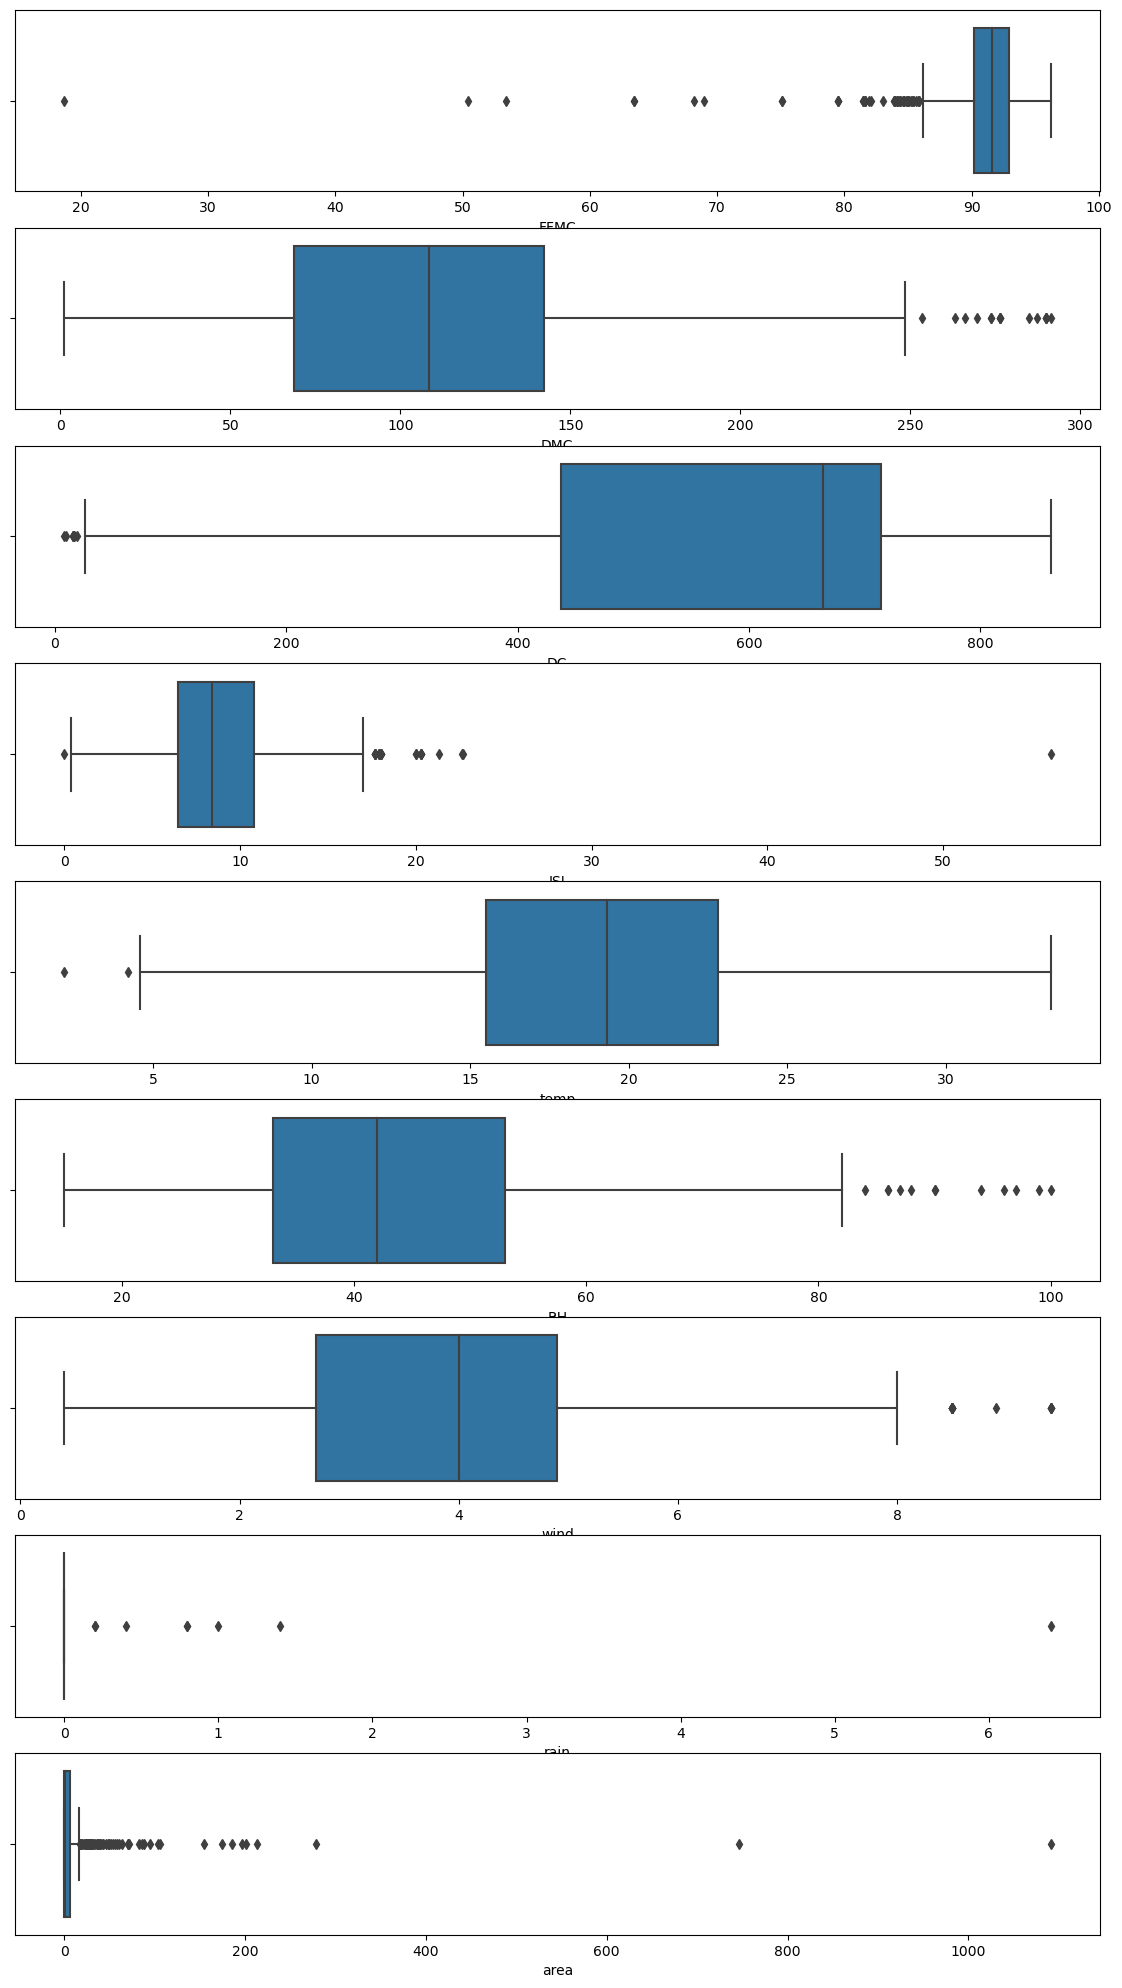

In [12]:
# for outlier detection-- boxplot
fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,25))

for i in range (0, len(numeric_features)):
    sns.boxplot(data[numeric_features[i]],ax=axes[i])
    

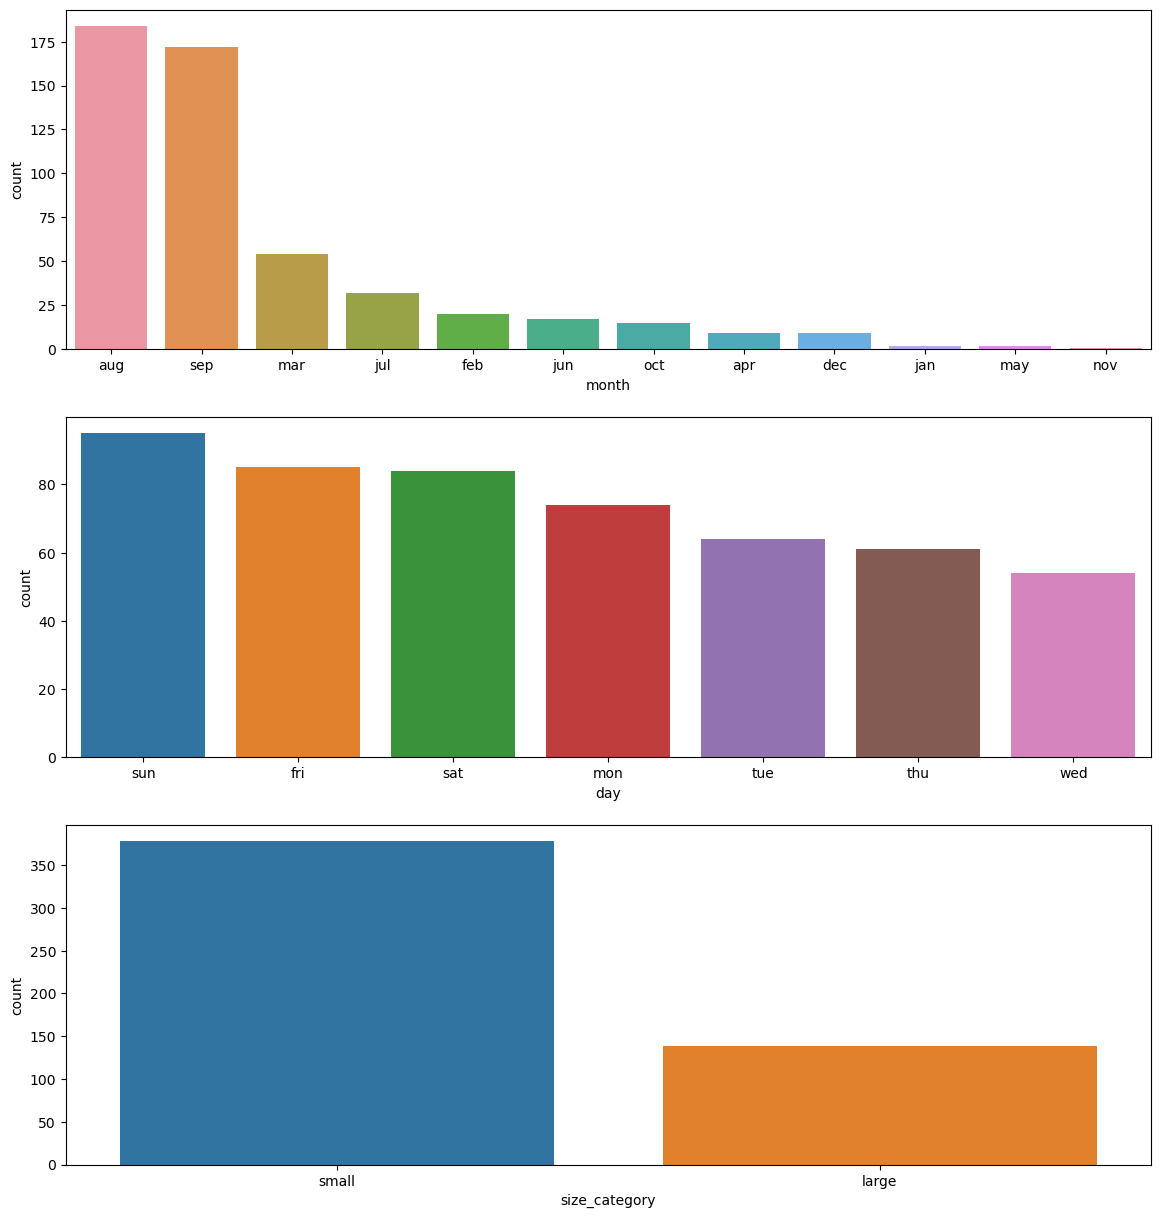

In [13]:
# for categorical_features -- barplot
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(raw_data[categorical_features[i]],ax=axes[i], order=raw_data[categorical_features[i]].value_counts().index)

<AxesSubplot:>

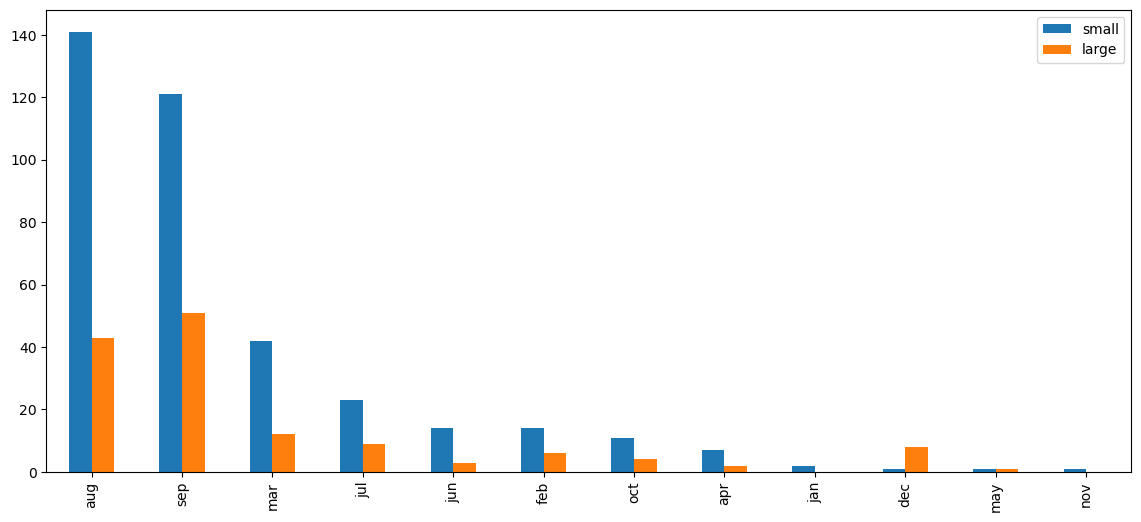

In [14]:
# 1) in absolute numbers
df = pd.DataFrame()

df['small'] = raw_data[raw_data['size_category'] == 'small']['month'].value_counts()
df['large'] = raw_data[raw_data['size_category'] == 'large']['month'].value_counts()
    
df.plot.bar(figsize=(14,6))  

<AxesSubplot:>

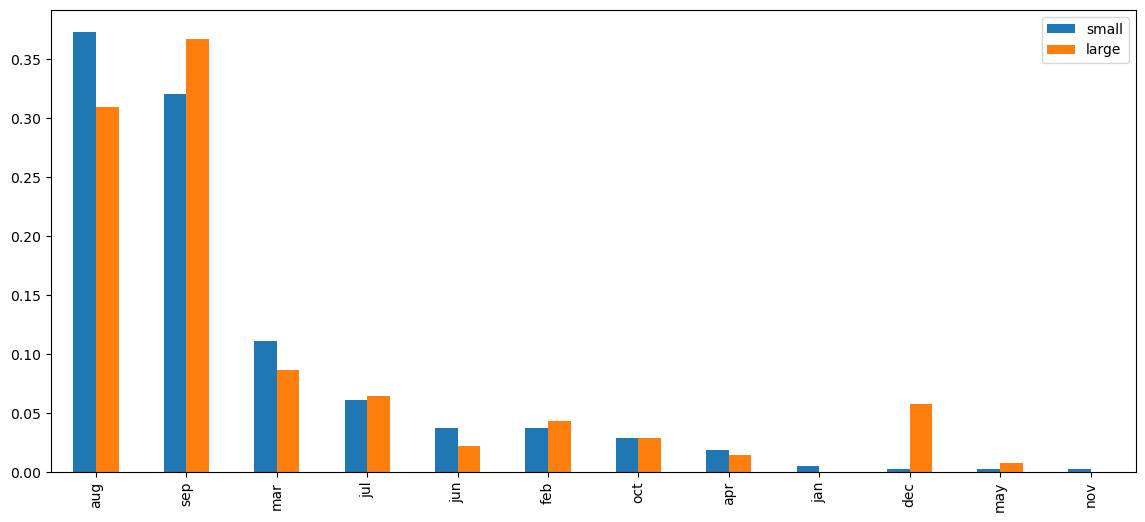

In [15]:
#2) in percentage
df['small'] = raw_data[raw_data['size_category'] == 'small']['month'].value_counts(normalize=True)
df['large'] = raw_data[raw_data['size_category'] == 'large']['month'].value_counts(normalize=True)
    
df.plot.bar(figsize=(14,6))  

Data Pre-Processing

In [16]:
x = data.copy()
x.drop('size_category',axis=1, inplace =True)

y = data[['size_category']]

In [17]:
# encoding output 
le = LabelEncoder()
y = le.fit_transform(y) 

# small : 1, large: 0

In [18]:
#inputs are already encoded, just need to drop month and day columns
x.drop(['month' , 'day'] , axis=1, inplace=True) 

In [19]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9)

In [20]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape) 

Shape of X_train:  (361, 28)
Shape of X_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test (156,)


SVM with default hyper parameters

In [21]:

classifier = SVC()
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)

accuracy_score(y_test, pred)

0.75

GridSearchCV for optimum hyper parameters

In [22]:
classifier = SVC()
param_grid = [{'kernel':['rbf', 'linear', 'poly'],'gamma':[50,5,10,0.5,0.2,0.1],
               'C':[100,90,75,55,50,45,20,10,0.1,0.001],'degree': [2,3,4] }]

gsv = GridSearchCV(classifier,param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [100, 90, 75, 55, 50, 45, 20, 10, 0.1, 0.001],
                          'degree': [2, 3, 4],
                          'gamma': [50, 5, 10, 0.5, 0.2, 0.1],
                          'kernel': ['rbf', 'linear', 'poly']}])

In [25]:
gsv.best_params_ , gsv.best_score_   

({'C': 100, 'degree': 2, 'gamma': 50, 'kernel': 'poly'}, 0.9695205479452056)

SVM with Optimised hyper parameters

In [26]:
classifier = gsv.best_estimator_

classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, pred) 
print("Accurcy of SVM is:", accuracy)
     

Accurcy of SVM is: 0.9807692307692307


In [27]:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.98      0.99       111

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



<AxesSubplot:>

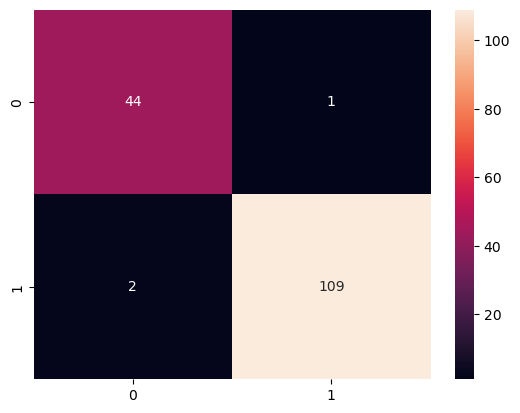

In [28]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d') 

In [29]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,pred)
print('AUC-ROC Score:',auc) 
     

AUC-ROC Score: 0.9798798798798798
